In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.linear_model import LogisticRegression # to apply the Logistic regression
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.cross_validation import KFold # use for cross validation
from sklearn.model_selection import GridSearchCV# for tuning parameter
from sklearn.ensemble import RandomForestClassifier # for random forest classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm # for Support Vector Machine
from sklearn import metrics # for the check the error and accuracy of the model
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. I like it most for plot
%matplotlib inline

/Users/naaz.27khan/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/naaz.27khan/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
movie = pd.read_csv('/Users/naaz.27khan/Documents/DS/project-3 prev/Resources/cleaned_data.csv')
movie.head()

,Unnamed: 0,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,...,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,movie_facebook_likes
0,0,Color,James Cameron,723.0,178.0,949.375628,855.0,Joel David Moore,1000.0,760505847.0,...,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,33000.000000
1,1,Color,Gore Verbinski,302.0,169.0,563.000000,1000.0,Orlando Bloom,40000.0,309404152.0,...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,16719.617661
2,2,Color,Sam Mendes,602.0,148.0,949.375628,161.0,Rory Kinnear,11000.0,200074175.0,...,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,85000.000000
3,3,Color,Christopher Nolan,813.0,164.0,22000.000000,23000.0,Christian Bale,27000.0,448130642.0,...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,164000.000000
4,5,Color,Andrew Stanton,462.0,132.0,475.000000,530.0,Samantha Morton,640.0,73058679.0,...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,24000.000000


In [4]:
movie.fillna(value=0,axis=1,inplace=True)

In [5]:
df_genres = pd.DataFrame(movie['genres'])
df_genres = pd.DataFrame(df_genres.genres.str.split('|').tolist(),columns=['Genre_'+str(i) for i in range(0,8)])
df_genres

,Genre_0,Genre_1,Genre_2,Genre_3,Genre_4,Genre_5,Genre_6,Genre_7
0,Action,Adventure,Fantasy,Sci-Fi,None,None,None,None
1,Action,Adventure,Fantasy,None,None,None,None,None
2,Action,Adventure,Thriller,None,None,None,None,None
3,Action,Thriller,None,None,None,None,None,None
4,Action,Adventure,Sci-Fi,None,None,None,None,None
5,Action,Adventure,Romance,None,None,None,None,None
6,Adventure,Animation,Comedy,Family,Fantasy,Musical,Romance,None
7,Action,Adventure,Sci-Fi,None,None,None,None,None
8,Adventure,Family,Fantasy,Mystery,None,None,None,None
9,Action,Adventure,Sci-Fi,None,None,None,None,None


In [6]:
features = ['actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross',
       'num_voted_users', 'cast_total_facebook_likes','imdb_score','facenumber_in_poster',
       'num_user_for_reviews', 'budget', 'title_year',
       'actor_2_facebook_likes',
       'movie_facebook_likes']
target = ['imdb_score']

In [7]:
train, test = train_test_split(movie,test_size=0.30)

In [8]:
train_x = train[features] 
train_y = train[target]
test_x = test[features]
test_y = test[target]

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_x_std = pd.DataFrame(sc.fit_transform(train_x),columns=features)
test_x_std = pd.DataFrame(sc.transform(test_x), columns=features)

# train_x_std.head(2)

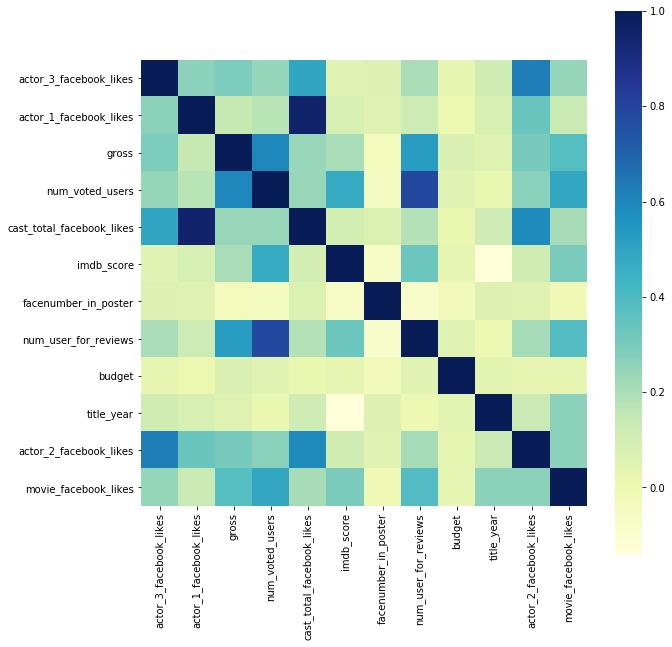

In [21]:
#draw correlation matrix of features
corr = train_x_std.corr()
#draw the heatmap of correlation to identify any features that can be dropped
plt.figure(figsize=(10,10))
sns.heatmap(corr, cbar = True,  square = True, annot=False,annot_kws={'size': 10},
            cmap= 'YlGnBu')

In [11]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(train_x_std,train_y)
predicted_rating = model.predict(test_x_std)

In [12]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, train_x_std, train_y, cv=5)
print("Linear regression accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Linear regression accuracy: 1.00 (+/- 0.00)


In [13]:
r2score  = metrics.r2_score(test_y,predicted_rating)
print('R2 score is:{} best score is 1.00 and worst is 0.00'.format(round(r2score,2)))

R2 score is:1.0 best score is 1.00 and worst is 0.00


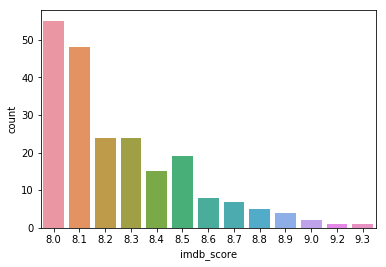

In [14]:
high_score_data= movie.loc[movie['imdb_score']>=8] #only count of movies with score>= 8.0
sns.countplot(high_score_data['imdb_score'],label='imdb_score')

In [15]:
#Introducing RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
#Convert target into a list as per the expectation of the algorithm
train_y = np.asarray(train_y, dtype="|S6")
test_y = np.asarray(test_y,dtype="|S6")
rf.fit(train_x_std,np.ravel(train_y))
predictions = rf.predict(test_x_std)

In [16]:
#Calculate cross valiation scores
from sklearn.model_selection import cross_val_score
print(test_y.shape)
scores = cross_val_score(rf, test_x_std,np.ravel(test_y), cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print('Maximum score in cross valuation is: %0.2f'%(scores.max()))

(1142, 1)


/Users/naaz.27khan/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


Accuracy: 0.70 (+/- 0.09)
Maximum score in cross valuation is: 0.76
